In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [136]:
df = pd.read_csv('athlete_events.csv')
df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [137]:
#df = df.dropna()
#df_new=df.fillna(0)
# удаляем лишнюю информацию
del df ['NOC']
del df ['Event']
del df ['Height']
del df ['Weight']
del df ['Age']

df.info()
# рассматриваем только медалистов
df_new = df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 10 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Team      271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Medal     39783 non-null object
dtypes: int64(2), object(8)
memory usage: 20.7+ MB


In [191]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39783 entries, 3 to 271103
Data columns (total 10 columns):
ID        39783 non-null int64
Name      39783 non-null object
Sex       39783 non-null object
Team      39783 non-null object
Games     39783 non-null object
Year      39783 non-null int64
Season    39783 non-null object
City      39783 non-null object
Sport     39783 non-null object
Medal     39783 non-null object
dtypes: int64(2), object(8)
memory usage: 3.3+ MB


в каком городе было проведено самое большое количесвто летних игр. Вывести первую десятку

In [192]:
#рассматриваем только летние игры
df_city_summer = df_new[df_new['Season'] == 'Summer']

In [209]:
#только года и города-хозяева игр. 
df_yaer_city = df_city_summer[['Year','City']].drop_duplicates('Year').sort_values('Year')

dict_city = {}
for i in df_yaer_city['City']:
    #print(i)
    dict_city[i] = dict_city.get(i, 0) + 1
dict_city.items()


dict_items([('Athina', 3), ('Paris', 2), ('St. Louis', 1), ('London', 3), ('Stockholm', 1), ('Antwerpen', 1), ('Amsterdam', 1), ('Los Angeles', 2), ('Berlin', 1), ('Helsinki', 1), ('Melbourne', 1), ('Roma', 1), ('Tokyo', 1), ('Mexico City', 1), ('Munich', 1), ('Montreal', 1), ('Moskva', 1), ('Seoul', 1), ('Barcelona', 1), ('Atlanta', 1), ('Sydney', 1), ('Beijing', 1), ('Rio de Janeiro', 1)])


In [218]:
#сортируем по количеству игр
import operator
sorted_dict_city = sorted(dict_city.items(), key=operator.itemgetter(1), reverse=True)
sorted_dict_city


[('Athina', 3),
 ('London', 3),
 ('Paris', 2),
 ('Los Angeles', 2),
 ('St. Louis', 1),
 ('Stockholm', 1),
 ('Antwerpen', 1),
 ('Amsterdam', 1),
 ('Berlin', 1),
 ('Helsinki', 1),
 ('Melbourne', 1),
 ('Roma', 1),
 ('Tokyo', 1),
 ('Mexico City', 1),
 ('Munich', 1),
 ('Montreal', 1),
 ('Moskva', 1),
 ('Seoul', 1),
 ('Barcelona', 1),
 ('Atlanta', 1),
 ('Sydney', 1),
 ('Beijing', 1),
 ('Rio de Janeiro', 1)]

<BarContainer object of 23 artists>

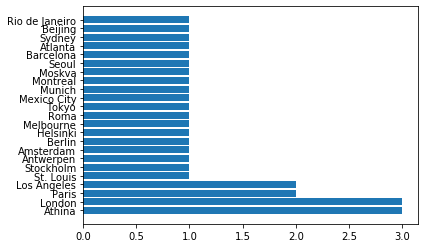

In [227]:
df_sorted_dict_city = pd.DataFrame(sorted_dict_city, columns=["City", "Number of times"])  

plt.barh(df_sorted_dict_city['City'], df_sorted_dict_city['Number of times'])
